# EDA
## Contents
* 1) Importing Libraries
* 2) Correlation Heat Map
* 3) ScatterPlot
* 4) PairPlot
* 5) Categorical Plots
* 6) Questions
* 7) Hypothesis

## 1) Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from ydata_profiling import ProfileReport 

In [2]:
file = '/Users/calebhill/Project 6/Data/Prepared Data/cars_df_clean.csv'

In [3]:
df = pd.read_csv(file, index_col = 0)

In [4]:
df.head()

,price,brand,year,title_status,mileage,color,state,country,condition
0,6300,toyota,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


## 2) Correlation Heat Map

In [5]:
sub = df.select_dtypes('number')
sub

,price,year,mileage
0,6300,2008,274117.0
1,2899,2011,190552.0
2,5350,2018,39590.0
3,25000,2014,64146.0
4,27700,2018,6654.0
...,...,...,...
2494,7800,2019,23609.0
2495,9200,2018,34553.0
2496,9200,2018,31594.0
2497,9200,2018,32557.0


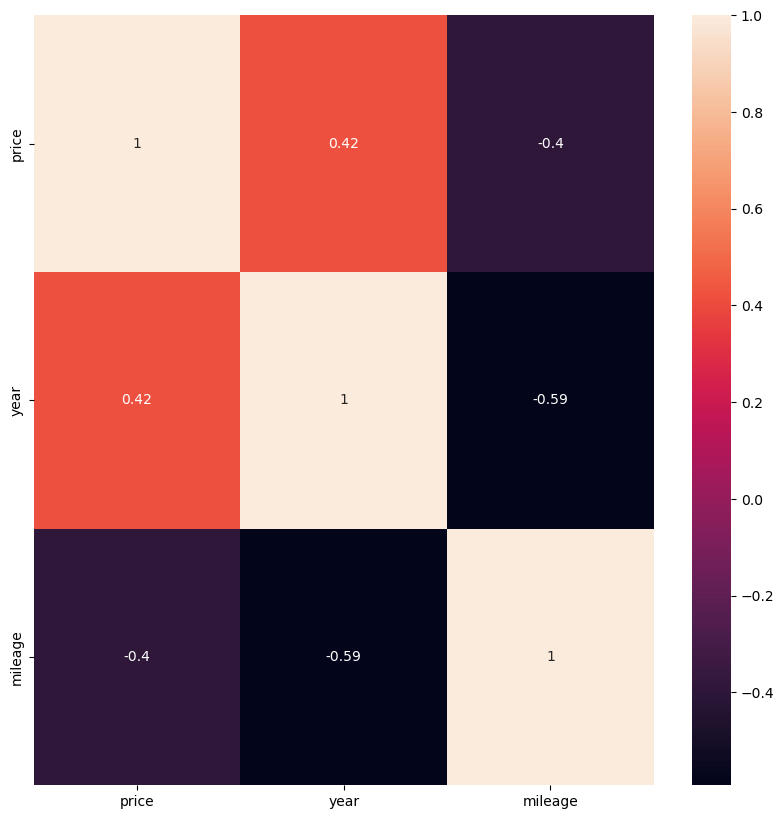

In [6]:
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 


**Explanation**
* There is a strong negative correlation between model year and mileage, the older the year the higher the mileage. 
* For mileage and price there is a moderate, negative correlation, the higher the mileage the lower the price. 
* There is a moderate, positive correlation between year and price, the newer the year the higher the price.

## 3) ScatterPlot

/Users/calebhill/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


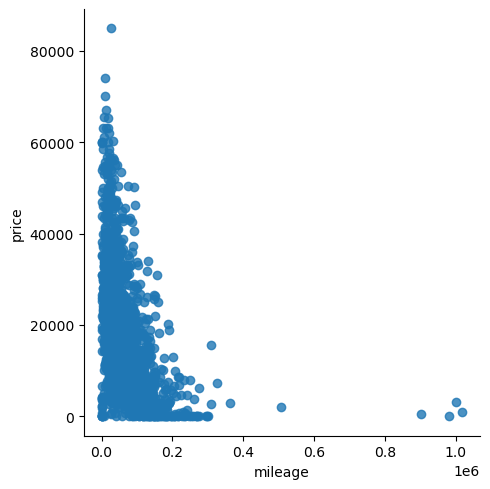

In [7]:
price_mileage = sns.lmplot(x = 'mileage', y = 'price', data = df, fit_reg =False)

**Explanation**

* It looks like no cars with more than 40,000 miles have a price higher than ≈ $5,000
* Creating a year category flag with old, middle, and young car ages and using it as the hue 
  for this graph would help determine if those lower-priced cars with low-mileage are there     because of age.

/Users/calebhill/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


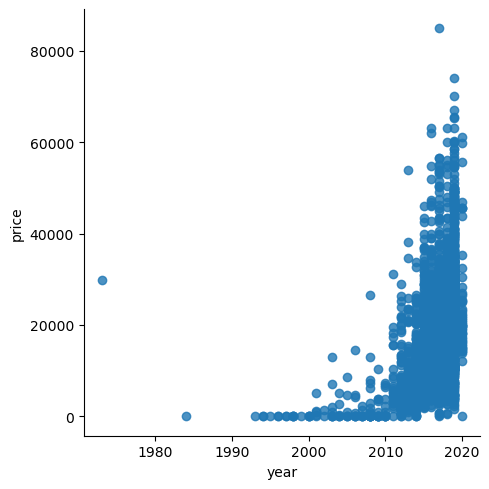

In [8]:
year_price = sns.lmplot(x = 'year', y = 'price', fit_reg = False, data = df)

**Explanation**
* There is 1 outlier that is old and expensive, probably due to being a collectors item
* Other than the outlier there are no cars older than 2010 with a price above $20,000

/Users/calebhill/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


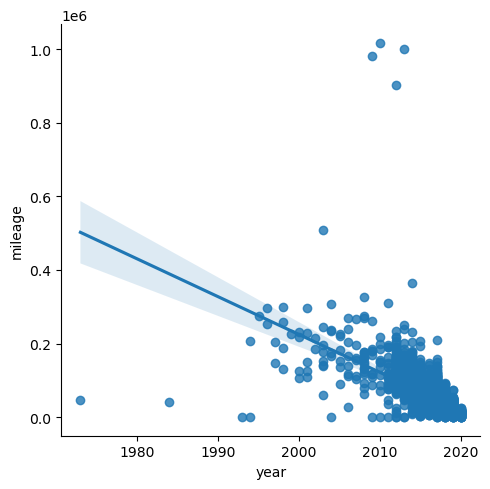

In [9]:
year_mileage = sns.lmplot(x = 'year', y = 'mileage', data = df)

***Explanation***
* Ignoring the outliers, there is a clear negative trend of older cars having higher mileage.

## 4) PairPlot

/Users/calebhill/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


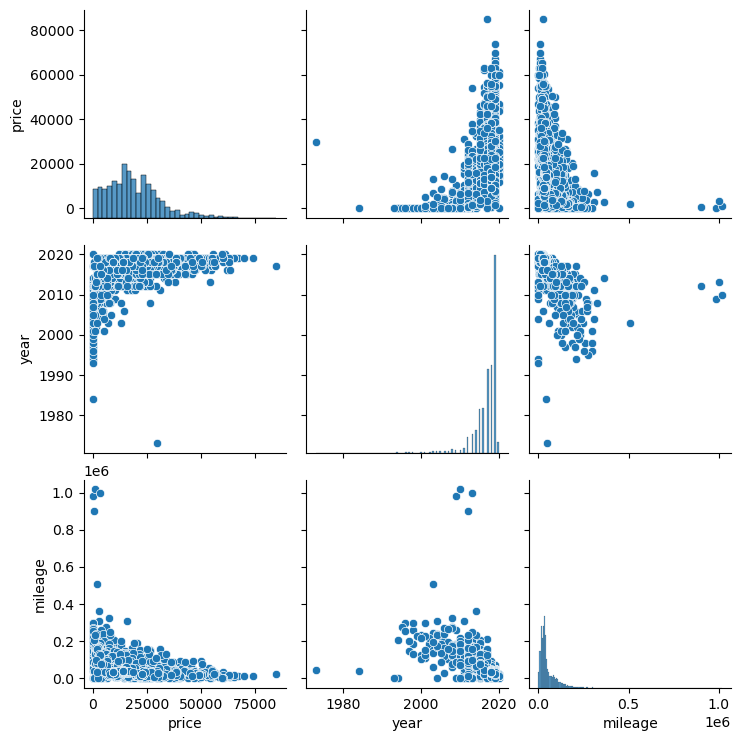

In [10]:
pp = sns.pairplot(df)

***Explanation***
* The pair plot further confirms my previous explanations, I'm interested in better  
  understanding the relationship between mileage and price and how these correlate with the  
  categorical variables.

## 5) Categorical Plots

/Users/calebhill/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


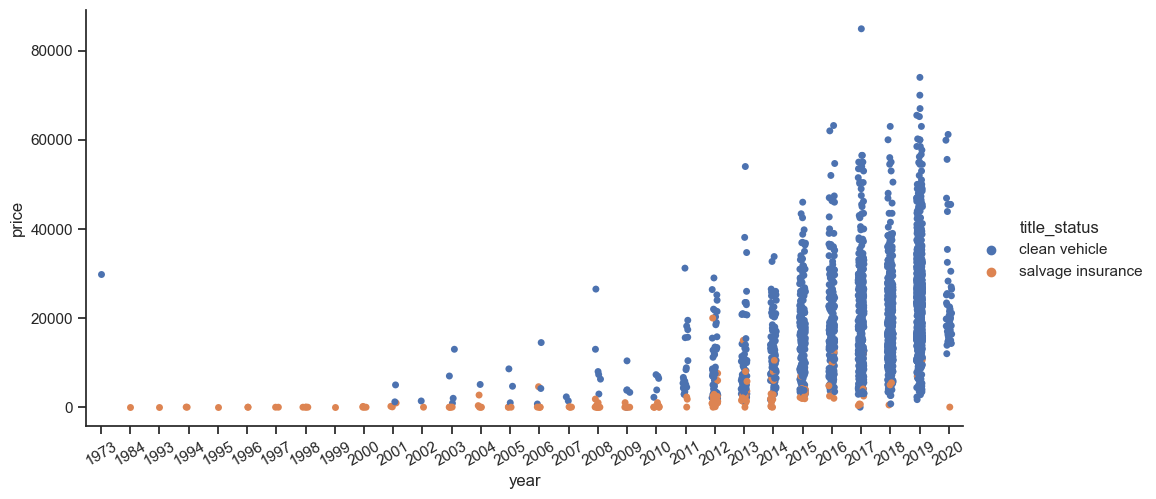

In [11]:
sns.set(style="ticks")
price_year_cat = sns.catplot(x="year", y="price", hue = 'title_status',data=df, aspect = 2)
price_year_cat.set_xticklabels(rotation=30)


***Explanation***
* Years 2000 and older only have salvage titles and are all priced low (<$5,000)

* There are no cars less than ≈ $30,000 with a salvage title


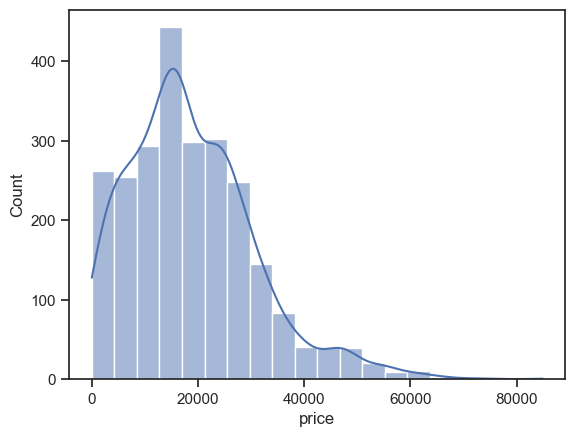

In [12]:
price_dist = sns.histplot(df['price'], bins = 20, kde = True)

***Explanation***
* Cars sold for more than $30,000 make up the smallest amount of sales

* Most cars sold are between 15,000 and 30,000 dollars



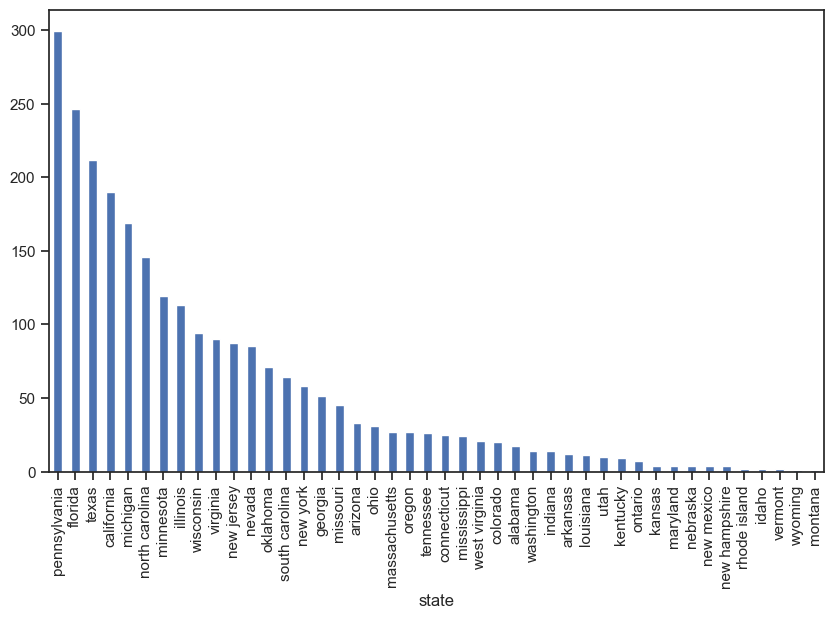

In [13]:
state_dist = df['state'].value_counts().plot.bar(figsize = (10,6))


## 6) Questions

***Previous Questions***
* Variables with a moderate or strong correlation (see report below):
  * Title Status: Price, Year, Mileage and State 
  * Brand: Mileage
  * Mileage: -Price, -Year, Brand, Title Status
  * Year: Price, -Mileage, Title Status
  * Price: Year, -Mileage, Title Status
  * Color: None
  * State: Title Status, Country
  * Country: State
  * Condition: Title Status, State, Country
 
 * Imbalanced Variables:
   * Brand
   * Title Status
   * Country
   
 * See the above graph for the distribution of state sales

***New Questions***
* Why is there a correlation between title status and state?
* Does the brand imbalance correlate with the price or another variable? (i.e. BMW has less sales than hyundai but with higher prices per car)
* Why is there a correlation between condition and Title Status & State

In [14]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 7) Hypothesis

I don't believe I'm ready to state a hypothesis, however, some things I'm interested in exploring more are the answers to my questions because I believe they will provide me with enough insight to form a hypothesis. And once I create some flags out of the variables I'll be able to more effectively gain insight from the visualizations. (I'm also not sure how to utilize the condition column)